In [1]:
import numpy as np
import h5py 
import cv2
import matplotlib.pyplot as plt

import sys
# add parent directory to path
sys.path.append('../')
from aggregate_statistics import get_rosettes, make_rosette_images

path = '../../CodePass2/runs/'
path = "D:/"
with h5py.File(path+'finale_normal.hdf5', 'r') as f:
    # read the data
    positions = f['x'][:]
    properties = f['properties'][:][0]
    p = f['p'][:]


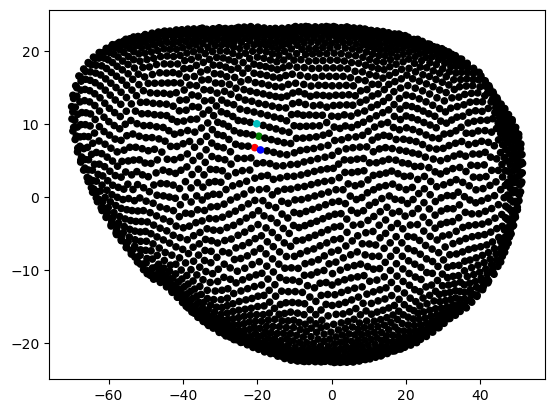

In [4]:
allids = properties
cc = []
for i in range(len(properties)):
    if i == 786:
        cc.append('r')
    elif i == 2346:
        cc.append('g')
    elif i == 2243:
        cc.append('b')
    elif i == 4388:
        cc.append('c')
    else:
        cc.append('k')
xx,yy,zz = positions[10,:,0], positions[10,:,1], positions[10,:,2]

plt.scatter(xx[yy<0], zz[yy<0], c=np.array(cc)[yy<0], s=20)

In [2]:
# get the rosettes
rosettes = get_rosettes(positions, properties, [1], 10, max_dist =  3)
counts, vecs_between = rosettes
vecs_between = np.array(vecs_between)

# # save the rosettes
# np.save('rosettes.npy', rosettes)
# # save the vecs_between
# np.save('vecs_between.npy', vecs_between)

  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [04:39<00:00,  1.07it/s]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (299,) + inhomogeneous part.

In [3]:
# save the rosettes
np.save('rosettes.npy', rosettes)
# save the vecs_between
np.save('vecs_between.npy', np.array(vecs_between))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

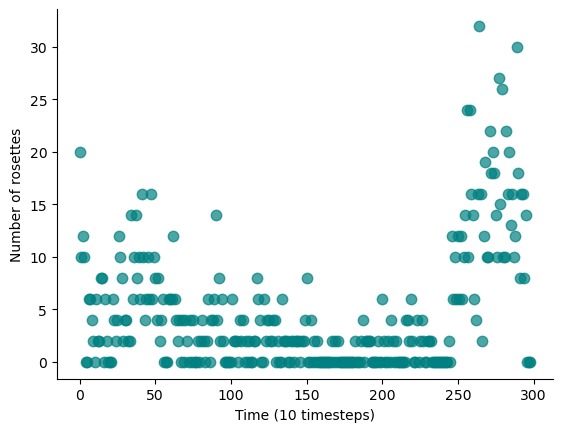

In [24]:

y = counts.sum(axis=1)[1:]
# smooth the data
# y = np.convolve(y, np.ones(10)/10, mode='valid')
plt.plot(y,'.', ms=15, alpha = 0.7, c= 'teal')
plt.ylabel('Number of rosettes')
plt.xlabel('Time (10 timesteps)')
import seaborn as sns
sns.despine()
plt.show()

[[],
 [],
 [array([-1.4256725,  1.0467834,  1.5482359], dtype=float32),
  array([-1.334547  , -0.32725143,  1.3683162 ], dtype=float32),
  array([-1.5408497 , -0.26380157,  1.3795624 ], dtype=float32),
  array([ 1.2512097, -0.7893219, -1.4214888], dtype=float32),
  array([-1.7112083 ,  0.3298111 ,  0.46243286], dtype=float32),
  array([-1.4775243 , -0.05379868,  1.6274369 ], dtype=float32),
  array([ 1.334547  ,  0.32725143, -1.3683162 ], dtype=float32),
  array([1.0318298, 0.3986416, 1.5553503], dtype=float32),
  array([ 0.3730259 , -0.77444077,  1.8682456 ], dtype=float32),
  array([-1.1723604,  0.8916073, -1.6313457], dtype=float32),
  array([1.0608101, 0.4210434, 1.5914903], dtype=float32),
  array([-1.2695122, -0.3124199,  1.4985638], dtype=float32),
  array([-1.5994749 ,  0.45593452,  1.0745611 ], dtype=float32),
  array([-0.3730259 ,  0.77444077, -1.8682456 ], dtype=float32),
  array([ 1.5528183 , -0.04712486, -1.4303598 ], dtype=float32),
  array([-1.4798555, -0.8655386, -1.121

In [4]:
vecs_between = [np.array(v) for v in vecs_between]


In [8]:
angles

[[],
 [],
 array([ 2.3150048 ,  2.3437014 ,  2.411366  , -0.8490227 ,  2.8776593 ,
         2.3079503 , -0.7978914 ,  0.985054  ,  1.3737216 , -2.1939273 ,
         0.9828735 ,  2.273635  ,  2.55003   , -1.7678711 , -0.74437153,
        -2.4932392 ,  0.9820397 , -2.1565387 ,  2.2925699 ,  0.94766545,
        -0.8336423 , -0.73022664,  0.2551316 ,  2.654384  , -0.85575575,
        -2.8987956 ,  2.397221  ,  2.3829284 , -0.82658774,  2.285837  ,
        -2.158719  , -0.5915626 , -2.886461  , -2.159553  ,  0.24279708,
        -0.75866437,  0.6483535 , -0.86795765, -0.2639333 , -0.48720884,
         2.1678088 , -0.97378385], dtype=float32),
 array([ 0.5652087 ,  0.77453816,  2.5769565 ,  1.5525981 , -2.7359893 ,
        -0.65060467, -2.118276  , -2.3670545 ,  0.40560323,  0.3068294 ,
         2.490988  , -1.5889945 , -0.5646361 ,  0.98088694,  2.235384  ,
        -2.576384  , -2.8347633 , -0.9062086 ,  1.0233169 , -2.1607058 ],
       dtype=float32),
 array([ 2.266284  , -2.6199286 ,  0.59

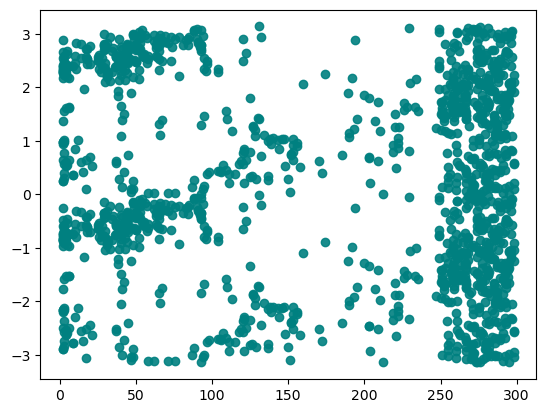

In [12]:

def get_angle(vecs):
    if len(vecs) == 0:
        return []
    xx, yy, zz = vecs.T 
    
    return np.arctan2(zz, xx)

angles = [get_angle(v) for v in vecs_between]
    
# usable = np.abs(zz) > np.abs(yy)
# angles = np.arctan2(zz[usable], xx[usable])
for i in range(len(angles)):
    if len(angles[i]) == 0:
        angles[i] = np.nan
    else:
        plt.plot([i]*len(angles[i]), angles[i], 'o', alpha = 0.9, c='teal')


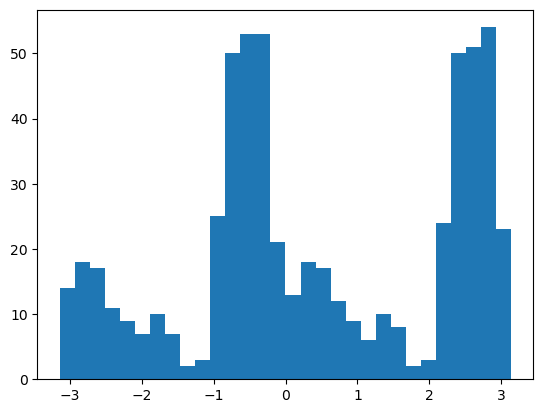

In [20]:
plt.hist(angles[:600], bins=30)
plt.show()